# ICT 782 - Day 10 Notes

# Further topics in Data Analysis

# Machine Learning

No doubt we've all heard the buzz around *machine learning*. The term conjures imagery of utopian societies with reduced-hour work weeks and the eventual takeover of the world by robots, or is that just for me? 

Today we'll talk about what machine learning means and look at a famous example: the artificial neural network (ANN).

## What does 'machine learning' mean?

When we introduced classification on Day 8, we actually introduced two machine learning techniques: logistic regression and k-Nearest Neighbors (kNN). Similarly, on Day 9 we introduced another machine learning technique: linear regression. Machine learning encompasses these model-building techniques and many more. 

Machine learning is a broad term that describes an entire field of study. Any time we train and test a statistical model, we are doing machine learning. The full scope of machine learning techniques includes the three steps we discussed on Day 8, adapted here for general machine learning:

1. Training the model - we use a 'training set' to find parameters for our model.

2. Validating the model - we use the model from step 1 with a 'validation set'. We keep track of any errors made by our model and update the model parameters to reduce these errors.

3. Testing the model - we use the updated model from step 2 on a 'test set'. This is the final unbiased evaluation of the model (the model is not updated anymore).

# Setting up

For today's examples and exercises, we'll need two important machine learning packages: `Tensorflow` and `keras`. `Tensorflow` is an optimized library for the strenuous calculations involved with machine learning algorithms, and `keras` is a user-friendly interface for `Tensorflow`.

- install `Tensorflow` from the command line with conda - `conda install tensorflow`
- install `keras` from the command line with - `conda install keras`

**Note:** Though we'll be using `Tensorflow`, we won't explicitly `import` the package. Instead, `keras` takes care of that for us.

# Artificial Neural Networks (ANN)

In a loose sense, ANNs are generalizations of linear and logistic regression, depending on the measure of error. If we use the mean-squared error (MSE), then we have linear regression. If we use the *cross-entropy* error, then we have logistic regression. These measures of error are usually called **loss functions**.

## What ANNs can and can't do

There is an aptly named 'Universal Approximation Theorem' that states that for any continuous function, there is an ANN that can approximate the continuous function arbitrarily well (Hornik, 1991). For example, in the case of linear regression, we expect that there is some linear function that can describe the relationships between two or more variables. The Universal Approximation Theorem states that an ANN can find this linear function. Furthermore, if we relax our expectations and instead only assume that a *continuous* function explains the relationship between the variables, then an ANN can approximate this function as well. We'll see an example of exactly this below.

Like most computer applications, ANNs can only do what they are told. There are two streams of study for the training of ANNs: **supervised** and **unsupervised** learning. In **supervised** learning, a training set complete with correct training targets is used to train the model. In linear regression, this amounts to providing the model with a column of targets $Y$ given the predictor variable columns $X_1$, $X_2$, ... $X_p$. In **unsupervised** learning, only the predictor variables are provided, and the model is trained to find hidden patterns within the dataset. Today we'll only talk about **supervised** learning.

This information alone might be a disappointment to sensationalist media articles. While ANNs and their extensions have been used to classify digital images, track objects in videos, navigate complex environments, and classify movie reviews, they still have not come remotely close to achieving the 'singularity' (the point at which an AI becomes self-aware).

## What does an ANN look like?

(see handwritten notes)

## What is an 'activation function'?

The 'activation function' was originally introduced to simulate the firing of neurons in an organism's nervous system. These functions, together with the interconnectivity of the network units and layers, are the main reason behind the label 'neural networks'. 

The complete explanation of what the activation function does is fairly technical, but can be summarized as follows. Neural networks are searching for a *parametrization* of a continuous function. That is, the network searches for parameters that will capture the variability in the data. These parameters are found in a vector space on the surface of a hyperplane. The activation function tells the network which side of the hyperplane we should be looking at.

For a really nice overview of activation functions with their respective scholarly resources, check out [Adeel Ahmad's Blog post](https://adl1995.github.io/an-overview-of-activation-functions-used-in-neural-networks.html). Below are the plots of some commonly used activation functions.

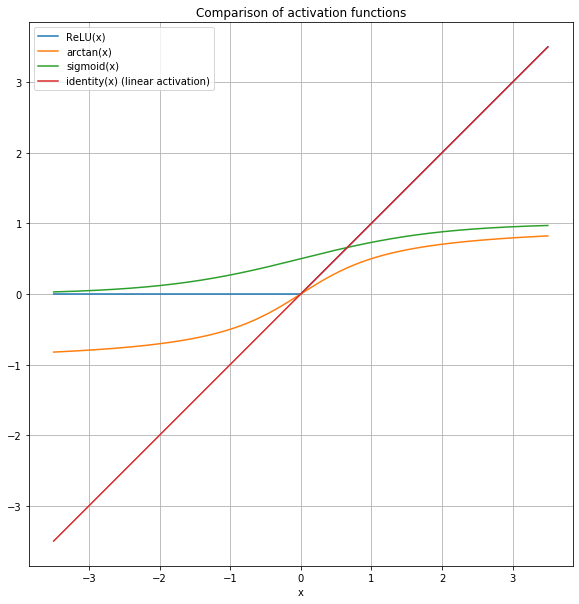

In [4]:
# Plot of some common activation functions

def relu(x):
    """ Rectified Linear Unit function """
    return np.array([np.max([0, element]) for element in x])

def sigmoid(z):
    """ The sigmoid function. """
    return 1.0/(1.0 + np.exp(-z))

fig, ax = plt.subplots(figsize = (10,10))

x = np.linspace(-3.5,3.5,501)

ax.plot(x, relu(x), label = 'ReLU(x)');
ax.plot(x, 2*np.arctan(x)/np.pi, label = 'arctan(x)');
ax.plot(x, sigmoid(x), label = 'sigmoid(x)');
ax.plot(x, x, label = 'identity(x) (linear activation)');
ax.set(title = 'Comparison of activation functions', 
       xlabel = 'x')
ax.set_aspect('equal', 'box');
ax.legend();
ax.grid();

# *Example:* ANN with the `Advertising` dataset

Let's see an ANN using the `Advertising.csv` dataset. We'll predict `sales` based on values of `TV`. The ANN for this example will have the following architecture:

- Input layer with one coefficient that takes in the data (one unit per data point); this layer will use the 'ReLU' activation function
- One hidden layer; this is a Dense (fully connected) layer with 32 units; 'linear' activation function
- Output layer; Dense (fully connected) layer with 1 unit

Each successive layer is fully connected to the previous layer.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential

Using TensorFlow backend.


In [61]:
advert = pd.read_csv('Advertising.csv')

# Saving 40% of the data for testing
train, test = train_test_split(advert, test_size = 0.4)

X_train = train['TV']
Y_train = train['sales']

X_test = test['TV']
Y_test = test['sales']

In [62]:
len(X_train)

120

In [63]:
120*32

3840

In [64]:
model = Sequential([
    Dense(len(X_train), activation = 'sigmoid', input_shape=[1], use_bias = True),
    Dense(32, activation = 'linear'),
    Dense(1)
  ])

# Put the model together with an optimization algorithm and loss function
model.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

In [65]:
model.fit(X_train, Y_train,
                epochs=10,
                batch_size=8,
                shuffle=False,
                validation_data=(X_test, Y_test));

Train on 120 samples, validate on 80 samples
Epoch 1/10
120/120 [==============================] - 0s 849us/step - loss: 158.2686 - val_loss: 61.7007
Epoch 2/10
120/120 [==============================] - 0s 175us/step - loss: 46.0658 - val_loss: 21.2846
Epoch 3/10
120/120 [==============================] - 0s 192us/step - loss: 21.2976 - val_loss: 16.0284
Epoch 4/10
120/120 [==============================] - 0s 183us/step - loss: 16.2083 - val_loss: 13.8803
Epoch 5/10
120/120 [==============================] - 0s 192us/step - loss: 14.1627 - val_loss: 12.5194
Epoch 6/10
120/120 [==============================] - 0s 192us/step - loss: 12.9049 - val_loss: 11.7259
Epoch 7/10
120/120 [==============================] - 0s 192us/step - loss: 12.2518 - val_loss: 11.3053
Epoch 8/10
120/120 [==============================] - 0s 225us/step - loss: 11.9212 - val_loss: 11.0214
Epoch 9/10
120/120 [==============================] - 0s 291us/step - loss: 11.7184 - val_loss: 10.8193
Epoch 10/10
120/12

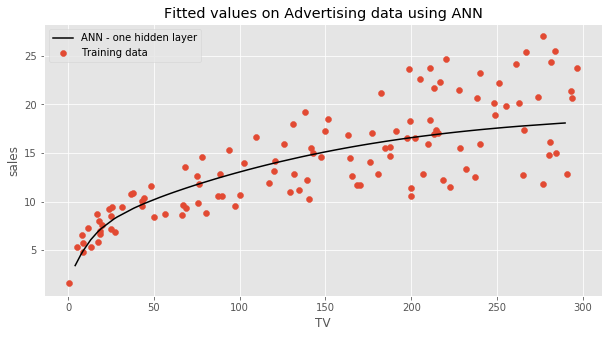

In [66]:
# Plotting the resulting curve

y_pred = pd.Series(model.predict(X_test).T[0])

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(X_train, Y_train, label = 'Training data');
ax.plot(X_test.sort_values(), y_pred.sort_values(), 'k', label = 'ANN - one hidden layer');
ax.set(title = 'Fitted values on Advertising data using ANN', 
       xlabel = 'TV', 
       ylabel = 'sales');
ax.legend();

Let's see what happens if we add one more hidden Dense layer.

In [67]:
model3 = Sequential([
    Dense(len(X_train), activation = 'sigmoid', input_shape=[1], use_bias = True),
    Dense(32, activation = 'sigmoid'),
    Dense(32, activation = 'linear'),
    Dense(1)
  ])

# Put the model together with an optimization algorithm and loss function
model3.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

In [68]:
model3.fit(X_train, Y_train,
                epochs=10,
                batch_size=8,
                shuffle=False,
                validation_data=(X_test, Y_test));

Train on 120 samples, validate on 80 samples
Epoch 1/10
120/120 [==============================] - 0s 999us/step - loss: 186.3589 - val_loss: 113.4503
Epoch 2/10
120/120 [==============================] - 0s 183us/step - loss: 97.5576 - val_loss: 55.3017
Epoch 3/10
120/120 [==============================] - 0s 275us/step - loss: 50.6655 - val_loss: 28.6637
Epoch 4/10
120/120 [==============================] - 0s 208us/step - loss: 30.9738 - val_loss: 21.9841
Epoch 5/10
120/120 [==============================] - 0s 208us/step - loss: 25.7252 - val_loss: 20.4339
Epoch 6/10
120/120 [==============================] - 0s 200us/step - loss: 22.9010 - val_loss: 18.0464
Epoch 7/10
120/120 [==============================] - 0s 208us/step - loss: 19.5362 - val_loss: 15.4148
Epoch 8/10
120/120 [==============================] - 0s 200us/step - loss: 16.2322 - val_loss: 13.2183
Epoch 9/10
120/120 [==============================] - 0s 325us/step - loss: 13.8496 - val_loss: 11.9247
Epoch 10/10
120/1

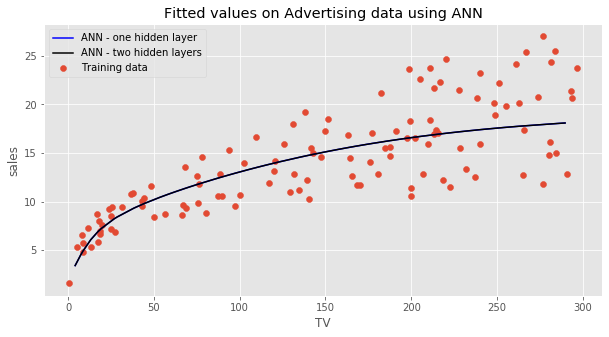

In [69]:
# Plotting the resulting curve

y_pred3 = pd.Series(model.predict(X_test).T[0])

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(X_train, Y_train, label = 'Training data');
ax.plot(X_test.sort_values(), y_pred.sort_values(), 'b', label = 'ANN - one hidden layer');
ax.plot(X_test.sort_values(), y_pred3.sort_values(), 'k', label = 'ANN - two hidden layers');
ax.set(title = 'Fitted values on Advertising data using ANN', 
       xlabel = 'TV', 
       ylabel = 'sales');
ax.legend();

# Exercises

1. Visually compare the line of best fit for the `Advertising.csv` dataset (relating `TV` to `sales`) from Day 9 to the output from the ANN above. Which one better captures the relationship between the variables?

In [70]:
from statsmodels.formula.api import ols

# Make sure we fit the intercept
advert = sm.add_constant(advert)

model5 = ols('sales ~ TV', data = advert).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.47e-42
Time:                        11:31:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

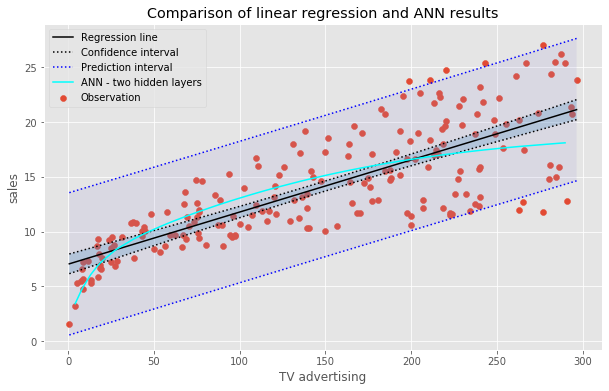

In [71]:
predictions = model5.get_prediction(advert[['TV','const']]).summary_frame(alpha = 0.05)

# This defines the regression line
Y_pred = predictions['mean'].sort_values()

# These define the 95% confidence interval
ci_upper = predictions['mean_ci_upper'].sort_values()
ci_lower = predictions['mean_ci_lower'].sort_values()

# These define the prediction interval
pi_upper = predictions['obs_ci_upper'].sort_values()
pi_lower = predictions['obs_ci_lower'].sort_values()

X_plot = advert['TV'].sort_values()

fig, ax = plt.subplots(figsize = (10,6))

# Plot the observations
ax.scatter(advert['TV'], advert['sales'], marker = 'o', label = 'Observation');

# Plot the regression line
ax.plot(X_plot, Y_pred, 'k', label = 'Regression line');

# Plot the confidence interval
ax.plot(X_plot, ci_upper, 'k:');
ax.plot(X_plot, ci_lower, 'k:', label = 'Confidence interval');

# Plot the prediction interval
ax.plot(X_plot, pi_upper, 'b:');
ax.plot(X_plot, pi_lower, 'b:', label = 'Prediction interval');

plt.fill_between(X_plot, ci_lower, ci_upper, alpha = 0.25);
plt.fill_between(X_plot, pi_lower, pi_upper, alpha = 0.15);

# ANN result
ax.plot(X_test.sort_values(), y_pred3.sort_values(), color = [0, 1, 1], label = 'ANN - two hidden layers');

ax.set(title = 'Comparison of linear regression and ANN results', 
       xlabel = 'TV advertising', 
       ylabel = 'sales');
ax.legend();

2. Add another hidden Dense layer to the ANN above. Give this layer 64 units and use the 'ReLU' activation function.

In [72]:
model4 = Sequential([
    Dense(len(X_train), activation = 'sigmoid', input_shape=[1], use_bias = True),
    Dense(32, activation = 'sigmoid'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'linear'),
    Dense(1)
  ])

# Put the model together with an optimization algorithm and loss function
model4.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

In [73]:
model4.fit(X_train, Y_train,
                epochs=10,
                batch_size=8,
                shuffle=False,
                validation_data=(X_test, Y_test));

Train on 120 samples, validate on 80 samples
Epoch 1/10
120/120 [==============================] - 0s 1ms/step - loss: 154.9977 - val_loss: 62.1201
Epoch 2/10
120/120 [==============================] - 0s 217us/step - loss: 43.1579 - val_loss: 21.8778
Epoch 3/10
120/120 [==============================] - 0s 242us/step - loss: 25.4788 - val_loss: 20.1310
Epoch 4/10
120/120 [==============================] - 0s 217us/step - loss: 22.8837 - val_loss: 18.0038
Epoch 5/10
120/120 [==============================] - 0s 208us/step - loss: 19.9293 - val_loss: 15.7175
Epoch 6/10
120/120 [==============================] - 0s 267us/step - loss: 16.9010 - val_loss: 13.6609
Epoch 7/10
120/120 [==============================] - 0s 300us/step - loss: 14.4618 - val_loss: 12.2283
Epoch 8/10
120/120 [==============================] - 0s 275us/step - loss: 13.0926 - val_loss: 11.5568
Epoch 9/10
120/120 [==============================] - 0s 258us/step - loss: 12.5504 - val_loss: 11.1787
Epoch 10/10
120/120 

In [74]:
print(model3.evaluate(x = X_train, y = Y_train))
print(model4.evaluate(x = X_train, y = Y_train))

120/120 [==============================] - 0s 33us/step
11.568507448832195
120/120 [==============================] - 0s 33us/step
10.955632464090984


3. Increase the number of training epochs from 10 to 100 and visually compare the results with the ANN above.

In [75]:
model3.fit(X_train, Y_train,
                epochs=100,
                batch_size=8,
                shuffle=False,
                validation_data=(X_test, Y_test));

Train on 120 samples, validate on 80 samples
Epoch 1/100
120/120 [==============================] - 0s 208us/step - loss: 12.1233 - val_loss: 11.0476
Epoch 2/100
120/120 [==============================] - 0s 208us/step - loss: 11.8932 - val_loss: 10.8323
Epoch 3/100
120/120 [==============================] - 0s 208us/step - loss: 11.7586 - val_loss: 10.6840
Epoch 4/100
120/120 [==============================] - 0s 200us/step - loss: 11.6727 - val_loss: 10.5819
Epoch 5/100
120/120 [==============================] - 0s 217us/step - loss: 11.6148 - val_loss: 10.5093
Epoch 6/100
120/120 [==============================] - 0s 217us/step - loss: 11.5736 - val_loss: 10.4558
Epoch 7/100
120/120 [==============================] - 0s 208us/step - loss: 11.5426 - val_loss: 10.4146
Epoch 8/100
120/120 [==============================] - 0s 225us/step - loss: 11.5180 - val_loss: 10.3822
Epoch 9/100
120/120 [==============================] - 0s 242us/step - loss: 11.4977 - val_loss: 10.3560
Epoch 10/1

Epoch 78/100
120/120 [==============================] - 0s 225us/step - loss: 11.2341 - val_loss: 10.1774
Epoch 79/100
120/120 [==============================] - 0s 217us/step - loss: 11.2315 - val_loss: 10.1765
Epoch 80/100
120/120 [==============================] - 0s 208us/step - loss: 11.2289 - val_loss: 10.1756
Epoch 81/100
120/120 [==============================] - 0s 208us/step - loss: 11.2263 - val_loss: 10.1747
Epoch 82/100
120/120 [==============================] - 0s 283us/step - loss: 11.2237 - val_loss: 10.1737
Epoch 83/100
120/120 [==============================] - 0s 300us/step - loss: 11.2211 - val_loss: 10.1728
Epoch 84/100
120/120 [==============================] - 0s 208us/step - loss: 11.2185 - val_loss: 10.1719
Epoch 85/100
120/120 [==============================] - 0s 208us/step - loss: 11.2161 - val_loss: 10.1710
Epoch 86/100
120/120 [==============================] - 0s 208us/step - loss: 11.2137 - val_loss: 10.1702
Epoch 87/100
120/120 [========================

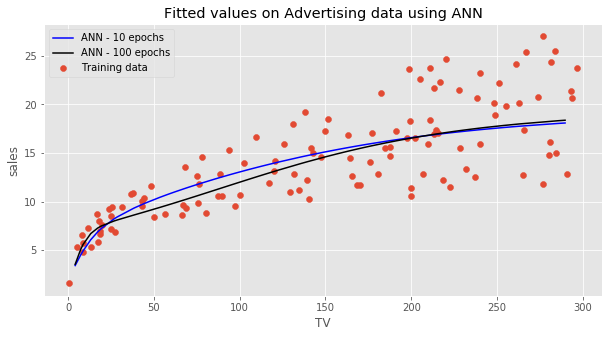

In [76]:
# Plotting the resulting curve

y_pred3 = pd.Series(model3.predict(X_test).T[0])

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(X_train, Y_train, label = 'Training data');
ax.plot(X_test.sort_values(), y_pred.sort_values(), 'b', label = 'ANN - 10 epochs');
ax.plot(X_test.sort_values(), y_pred3.sort_values(), 'k', label = 'ANN - 100 epochs');
ax.set(title = 'Fitted values on Advertising data using ANN', 
       xlabel = 'TV', 
       ylabel = 'sales');
ax.legend();

4. Use an ANN with the `admission_predict.csv` dataset to approximate the relationship between `GRE Score` and `Chance of Admit`.

In [77]:
admit = pd.read_csv('admission_predict.csv', index_col = 0)
admit

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [78]:
admit.columns = ['GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Y']
admit

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Y
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [79]:
# Saving 40% of the data for testing
train, test = train_test_split(admit, test_size = 0.4)

X_train = train['GRE']
Y_train = train['Y']

X_test = test['GRE']
Y_test = test['Y']

In [93]:
model5 = Sequential([
    Dense(len(X_train), activation = 'sigmoid', input_shape=[1], use_bias = True),
    Dense(128, activation = 'sigmoid'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'linear'),
    Dense(1) # output layer
  ])

# Put the model together with an optimization algorithm and loss function
model5.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

In [98]:
model5.fit(X_train, Y_train,
                epochs=500,
                batch_size=20,
                shuffle=False,
                validation_data=(X_test, Y_test));

Train on 300 samples, validate on 200 samples
Epoch 1/500
300/300 [==============================] - 0s 846us/step - loss: 0.0175 - val_loss: 0.0235
Epoch 2/500
300/300 [==============================] - 0s 123us/step - loss: 0.0187 - val_loss: 0.0288
Epoch 3/500
300/300 [==============================] - 0s 113us/step - loss: 0.0190 - val_loss: 0.0256
Epoch 4/500
300/300 [==============================] - 0s 113us/step - loss: 0.0184 - val_loss: 0.0269
Epoch 5/500
300/300 [==============================] - 0s 137us/step - loss: 0.0184 - val_loss: 0.0278
Epoch 6/500
300/300 [==============================] - 0s 120us/step - loss: 0.0185 - val_loss: 0.0275
Epoch 7/500
300/300 [==============================] - 0s 113us/step - loss: 0.0184 - val_loss: 0.0281
Epoch 8/500
300/300 [==============================] - 0s 120us/step - loss: 0.0184 - val_loss: 0.0284
Epoch 9/500
300/300 [==============================] - 0s 157us/step - loss: 0.0186 - val_loss: 0.0290
Epoch 10/500
300/300 [=====

300/300 [==============================] - 0s 129us/step - loss: 0.0185 - val_loss: 0.0268
Epoch 158/500
300/300 [==============================] - 0s 127us/step - loss: 0.0180 - val_loss: 0.0272
Epoch 159/500
300/300 [==============================] - 0s 110us/step - loss: 0.0187 - val_loss: 0.0191
Epoch 160/500
300/300 [==============================] - 0s 113us/step - loss: 0.0173 - val_loss: 0.0266
Epoch 161/500
300/300 [==============================] - 0s 113us/step - loss: 0.0181 - val_loss: 0.0194
Epoch 162/500
300/300 [==============================] - 0s 107us/step - loss: 0.0174 - val_loss: 0.0264
Epoch 163/500
300/300 [==============================] - 0s 110us/step - loss: 0.0184 - val_loss: 0.0282
Epoch 164/500
300/300 [==============================] - 0s 107us/step - loss: 0.0179 - val_loss: 0.0276
Epoch 165/500
300/300 [==============================] - 0s 107us/step - loss: 0.0183 - val_loss: 0.0275
Epoch 166/500
300/300 [==============================] - 0s 110us/ste

300/300 [==============================] - 0s 130us/step - loss: 0.0175 - val_loss: 0.0250
Epoch 313/500
300/300 [==============================] - 0s 163us/step - loss: 0.0177 - val_loss: 0.0281
Epoch 314/500
300/300 [==============================] - 0s 120us/step - loss: 0.0178 - val_loss: 0.0255
Epoch 315/500
300/300 [==============================] - 0s 110us/step - loss: 0.0179 - val_loss: 0.0192
Epoch 316/500
300/300 [==============================] - 0s 107us/step - loss: 0.0168 - val_loss: 0.0226
Epoch 317/500
300/300 [==============================] - 0s 150us/step - loss: 0.0179 - val_loss: 0.0280
Epoch 318/500
300/300 [==============================] - 0s 117us/step - loss: 0.0180 - val_loss: 0.0262
Epoch 319/500
300/300 [==============================] - 0s 110us/step - loss: 0.0174 - val_loss: 0.0335
Epoch 320/500
300/300 [==============================] - 0s 113us/step - loss: 0.0177 - val_loss: 0.0263
Epoch 321/500
300/300 [==============================] - 0s 110us/ste

300/300 [==============================] - 0s 120us/step - loss: 0.0177 - val_loss: 0.0283
Epoch 469/500
300/300 [==============================] - 0s 140us/step - loss: 0.0178 - val_loss: 0.0289
Epoch 470/500
300/300 [==============================] - 0s 113us/step - loss: 0.0176 - val_loss: 0.0301
Epoch 471/500
300/300 [==============================] - 0s 110us/step - loss: 0.0180 - val_loss: 0.0250
Epoch 472/500
300/300 [==============================] - 0s 107us/step - loss: 0.0173 - val_loss: 0.0315
Epoch 473/500
300/300 [==============================] - 0s 110us/step - loss: 0.0162 - val_loss: 0.0255
Epoch 474/500
300/300 [==============================] - 0s 107us/step - loss: 0.0162 - val_loss: 0.0170
Epoch 475/500
300/300 [==============================] - 0s 110us/step - loss: 0.0181 - val_loss: 0.0293
Epoch 476/500
300/300 [==============================] - 0s 107us/step - loss: 0.0181 - val_loss: 0.0289
Epoch 477/500
300/300 [==============================] - 0s 107us/ste

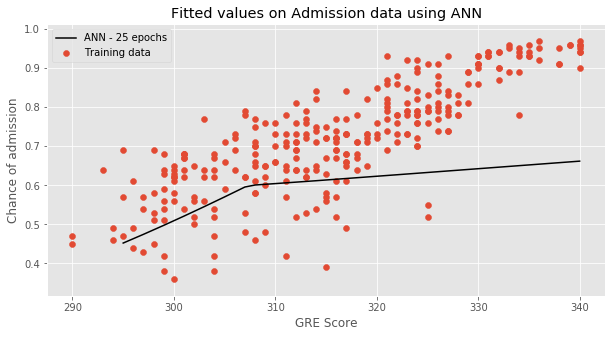

In [99]:
# Plotting the resulting curve

y_pred5 = pd.Series(model5.predict(X_test).T[0])

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(X_train, Y_train, label = 'Training data');
ax.plot(X_test.sort_values(), y_pred5.sort_values(), 'k', label = 'ANN - 25 epochs');
ax.set(title = 'Fitted values on Admission data using ANN', 
       xlabel = 'GRE Score', 
       ylabel = 'Chance of admission');
ax.legend();

# References

Hornik, K. (1991). Approximation capabilities of multilayer feedforward networks. *Neural Networks*, 4(2), 251-257.